# A (slightly more detailed) Numpy introduction

As we learned in the introduction Numpy provides an array object (technically correct: ndarray). It is the most important module for numerical and scientific programming. 

## Learning Outcomes

In this section we will look with a bit more detail into the numpy module and how to use arrays. At the end of this section you should get an understanding of:

* what are numpy ndarrays
* how to generate ndarrays
* how to do calculations using arrays
* understand basic indexing
* understand more advanced indexing like slicing and broadcasting (advanced)
* get a rough overview of included numpy functionality (advanced)

## Further Reading

* [Numpy Quickstart](https://docs.scipy.org/doc/numpy-1.15.0/user/quickstart.html)
* [Numpy for Matlab users](https://docs.scipy.org/doc/numpy-1.15.0/user/numpy-for-matlab-users.html)

## Numpy module

As discussed in the previous section the numpy module provides an N-dimensional array object that forms the fundamental basis of most numerical/scientific Python programs. 

To make the working with arrays easy numpy also contains
* powerful broadcasting versions of most fundamental mathematical functions
* tools for integrating with C, C++ and Fortran code
* some useful linear algebra, Fourier transform and random number generation routines

## The numpy array object

The central part of numpy is the `ndarray` object which is a homogenous multi-dimensional array. Essentially, it is a table of elements (typically, but not necessarily numeric) of the same (usually but not strictly) of the same type. All elements can be accessed by integer indices. Note that often `ndarrays` are just called `arrays`, however they are distinct (and more powerful) than the Python standard libraries `array.array` object. 

The following two examples are a one-dimensional array and a 2-dimensional (3x3) array
```
[1, 3, 1]

[[ 2, 3, 4],
 [ 4, 4, 4],
 [ 5, 5, 5]]
 ```

To use arrays efficiently it is useful to know about their most important attributes which are:

<dl>
    <dt>ndarray.ndim</dt>
        <dd>the number of axes (dimensions) of the array.</dd>
    <dt>ndarray.shape</dt>
        <dd>the dimensions of the array. This is a tuple of integers indicating the size of the array in each dimension. For a matrix with n rows and m columns, shape will be (n,m). The length of the shape tuple is therefore the number of axes, ndim.</dd>
    <dt>ndarray.size</dt>
        <dd>the total number of elements of the array. This is equal to the product of the elements of shape.</dd>
    <dt>ndarray.dtype</dt>
        <dd>an object describing the type of the elements in the array. One can create or specify dtype’s using standard Python types. Additionally NumPy provides types of its own. numpy.int32, numpy.int16, and numpy.float64 are some examples.</dd>
    <dt>ndarray.itemsize</dt>
        <dd>the size in bytes of each element of the array. For example, an array of elements of type float64 has itemsize 8 (=64/8), while one of type complex32 has itemsize 4 (=32/8). It is equivalent to ndarray.dtype.itemsize.</dd>
    <dt>ndarray.data</dt>
    <dd>the buffer containing the actual elements of the array. Normally, we won’t need to use this attribute because we will access the elements in an array using indexing facilities. </dd>
    </dl>

### Example

In [1]:
import numpy as np # this is convention, less typing

x1 = np.array([1., 3., 1.]) # the first array above
x2 = np.array([[ 2, 3, 4],[ 4, 4, 4],[ 5, 5, 5]])
print("x1 has {} dimenions".format(x1.ndim)) # 1D
print("x2 has {} dimenions".format(x2.ndim)) # 1D
print("The shape of x1 is {}".format(x1.shape))
print("The shape of x2 is {}".format(x2.shape))
print("The size of x1 is {}".format(x1.size))
print("The size of x2 is {}".format(x2.size))
print("x1.dtype={}".format(x1.dtype))
print("x2.dtype={}".format(x2.dtype)) # note the dtype for x1 and x2 is different ... Why?
print("x1.itemsize={}".format(x1.itemsize)) 
print("x2.itemsize={}".format(x2.itemsize)) 
print("x1.data={}".format(x1.data)) # not very useful to print
print(type(x1))

x1 has 1 dimenions
x2 has 2 dimenions
The shape of x1 is (3,)
The shape of x2 is (3, 3)
The size of x1 is 3
The size of x2 is 9
x1.dtype=float64
x2.dtype=int64
x1.itemsize=8
x2.itemsize=8
x1.data=<memory at 0x7ff2d4716380>
<class 'numpy.ndarray'>


## Creating Arrays

Arrays can be generated in a number of ways. As we have seen above we can create arrays from lists (or other python objects)

In [2]:
print(np.array([1, 2,3]))
print(np.array([1., 2, 3]))  
print(np.array([1, 2, 3+0j]))

# important see what happens if the elements have different types
print("--------------------")
print(np.array([1, 2,3]).dtype)
print(np.array([1., 2, 3]).dtype)
print(np.array([1, 2, 3+0j]).dtype)

# we can also use tuples and mix them with lists and initialize multi-dimensional arrays
print("--------------------")
print(np.array([[1,2,3], (3, 4, 5)]))

# We can also explicitly specify the dtype
print("--------------------")
print(np.array([1, 2, 3], dtype=complex))

[1 2 3]
[1. 2. 3.]
[1.+0.j 2.+0.j 3.+0.j]
--------------------
int64
float64
complex128
--------------------
[[1 2 3]
 [3 4 5]]
--------------------
[1.+0.j 2.+0.j 3.+0.j]


#### Some caveats

In [3]:
# this does not work
x = np.array(1, 2, 3)

TypeError: array() takes from 1 to 2 positional arguments but 3 were given

In [4]:
# this does not work as expected
print(np.array([[1, 2],
               [3, 4, 5]]))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

### Better array initialization

Creating arrays from lists is often tedious. Fortunately numpy provides a multitude of ways to create arrays in a convenient way

In [5]:
x = np.zeros(10)
print(x)
y = np.zeros((3, 4)) # note we are passing a tuple to generate a multi-dimensional array
print(y)
z = np.ones(5)
print(z)
u = np.empty(4)
print(u)
r1 = np.arange(10)
print(r1)
r2 = np.linspace(-5, 5, 20)
print(r2)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[1. 1. 1. 1. 1.]
[4.67058505e-310 0.00000000e+000 4.67158112e-310 4.67158111e-310]
[0 1 2 3 4 5 6 7 8 9]
[-5.         -4.47368421 -3.94736842 -3.42105263 -2.89473684 -2.36842105
 -1.84210526 -1.31578947 -0.78947368 -0.26315789  0.26315789  0.78947368
  1.31578947  1.84210526  2.36842105  2.89473684  3.42105263  3.94736842
  4.47368421  5.        ]


Importantly these functions also except the `dtype` parameter and otherwise work in the same way as `np.array` in how they determine the dtype

In [6]:
x = np.zeros(3, dtype=float)
print(x)
y = np.arange(5, dtype=complex)
print(y)
z = np.arange(5.)
print(z.dtype)

[0. 0. 0.]
[0.+0.j 1.+0.j 2.+0.j 3.+0.j 4.+0.j]
float64


It is worth looking in a bit more detail at the linspace and arange commands

In [7]:
print(np.arange(0, 20, 2))
print(np.linspace(-5, 5, 10)) # note contains end point and first point
print(np.linspace(-5, 5, 10, endpoint=False))

[ 0  2  4  6  8 10 12 14 16 18]
[-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
  1.66666667  2.77777778  3.88888889  5.        ]
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]


A very useful operation is to reshape arrays into a different shape. The most flexible way to achieve this is via the `reshape` method.

In [8]:
x = np.arange(10)
y = x.reshape(2,5)
print(y)
z = y.reshape(10,1)
print(z) # this is different to x!

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


## Accessing array elements

So now that we have learned how to create arrays how do we address elements?  

Numpy has a straight forward indexing scheme, which looks very similar to lists.

In [9]:
x = np.arange(10)
print(x[1])
x[2] = 11
print(x)

1
[ 0  1 11  3  4  5  6  7  8  9]


**Important** as you can see above unlike Matlab indexing starts at 0, i.e. `x[0]` is the first element in an array.

In [10]:
# accessing elements in multi-dimensional arrays is straight forward as well. 
x = np.array([[1, 2, 3],
            [4, 5, 6],
            [7, 8, 9]])
print(x[1, 1]) # separate the different dimensions by ','
x[2, 0] = 11
print(x)

5
[[ 1  2  3]
 [ 4  5  6]
 [11  8  9]]


### The matrix class

Be aware that numpy also supplies a `matrix` class, which works more like Matlab. Generally, it is recommended to use the array class instead (see [Numpy for Matlab users](https://docs.scipy.org/doc/numpy-1.15.0/user/numpy-for-matlab-users.html) for a more detailed discussion of pros and cons

## Numpy functions and operators

On top of the array class Numpy provides mathematical functions which "broadcast" for working with arrays. All fundamental functions are included.

In [11]:
x = np.arange(10)
x*2

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [12]:
x/2 # note that we perform a conversion to float 

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [13]:
x+1j

array([0.+1.j, 1.+1.j, 2.+1.j, 3.+1.j, 4.+1.j, 5.+1.j, 6.+1.j, 7.+1.j,
       8.+1.j, 9.+1.j])

In [14]:
x = np.array([[1, 2, 3],
            [4, 5, 6],
            [7, 8, 9]])
x.T #transpose

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [15]:
x = np.arange(10)
x.T # transpose for 1D arrays does not work

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


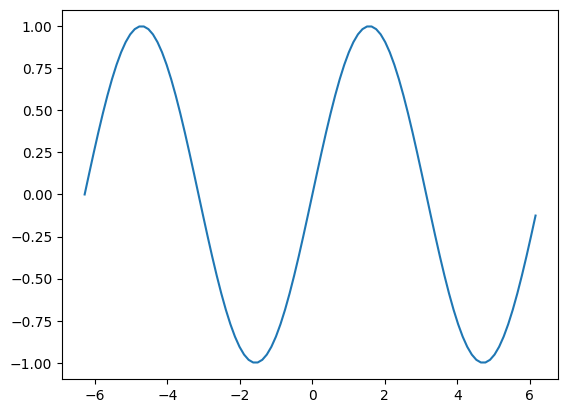

In [16]:
%pylab inline 
# we talk about the above line later
x = np.linspace(-2*np.pi, 2*np.pi, 100, endpoint=False)
y = np.sin(x)
plt.plot(x,y)

**Important** difference to Matlab. Operations are *element-wise* by default

In [17]:
x = np.arange(5)
print(x)
y = np.ones(5)*2
print(y)
print(x*y)
print(x**2)

[0 1 2 3 4]
[2. 2. 2. 2. 2.]
[0. 2. 4. 6. 8.]
[ 0  1  4  9 16]


If you want to have matrix operations you have to explicitly call the linear algebra functions (since python-3.5 the `@` operator works as well).

In [18]:
print(np.dot(x,y)) # Note that transpose is not needed if both vectors are 1D

20.0


In [19]:
print(x@y) #works since python 3.5

20.0


In [20]:
print(np.inner(x,y)) # equivalent with dot if arrays are 1D
print(np.dot(x,y)) 

20.0
20.0


In [21]:
print(np.outer(x,y)) # equivalent to dot 
print(np.dot(x.reshape(-1,1), y.reshape(1,-1)))

[[0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2.]
 [4. 4. 4. 4. 4.]
 [6. 6. 6. 6. 6.]
 [8. 8. 8. 8. 8.]]
[[0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2.]
 [4. 4. 4. 4. 4.]
 [6. 6. 6. 6. 6.]
 [8. 8. 8. 8. 8.]]


## Slicing (Supplementary material)

* So what if I want to access more than one element? 
* Or how do I access every second element?

The numpy indexing allows much more than simple accessing of indices. Generally for every dimension it follows the convention of `x[start:end:step]`, with the important point that this includes the `start` but excludes the `stop` element.

In [22]:
x = np.arange(10)
print(x)
print(x[1:3])
print(x[0:3])
print(x[:3]) # the 0 can be omitted if we start from the beginning
print(x[5:10])
print(x[5:]) # if we want to index to the end we can leave out the last element

[0 1 2 3 4 5 6 7 8 9]
[1 2]
[0 1 2]
[0 1 2]
[5 6 7 8 9]
[5 6 7 8 9]


In [23]:
print(x[-3:]) # we can also count backwards from the end
print(x[-1]) # -1 is the last element
print(x[-6:-1]) # but not included when end

[7 8 9]
9
[4 5 6 7 8]


In [24]:
print(x[::2]) # going over whole array we can omit start and end 

[0 2 4 6 8]


In [25]:
print(x[::-2]) # we can also go backwards

[9 7 5 3 1]


Array indexing can do even fancier things, see [Numpy indexing](https://docs.scipy.org/doc/numpy/user/basics.indexing.html) for a detailed overview.

### Reshaping revisited (Supplementary material)

If one wants to reshape an array into a row or column vector, one can also use the `reshape` method, a *-1* indicates all remaining elements. Often it is however more convenient to use `newaxis`.

In [26]:
x = np.arange(10)
y = x[:,np.newaxis] # this generates a column vector
print(y.shape)
print(y)
z = x.reshape(-1, 1)# equivalent to the above note the -1
print(z)

(10, 1)
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


## Broadcasting (Supplementary material)

Generally, when multiplying different arrays they need to have the same dimensions/elements

In [27]:
x = np.ones(4)
y = np.arange(3)
x*y # does not work

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

One of the most common ways of using the `newaxis` above is for broadcasting, which is if one wants to e.g. multiply every element of an array with a vector to create a matrix.

In [28]:
z = x[:,np.newaxis]*y[np.newaxis,:]
print(z)

[[0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]]


However broadcasting does not require `newaxis`. Have a look at the following example.

In [29]:
x = np.ones(6).reshape(2,3)
y = np.arange(1,4)
z = x * y # multiplies every row of x with y
print(z)
x = x.reshape(3,2)
y = y.reshape(3,1)
z = x * y # multiplication of every column of x with y
print(z)

[[1. 2. 3.]
 [1. 2. 3.]]
[[1. 1.]
 [2. 2.]
 [3. 3.]]


The rules for broadcasting are detailed in the numpy documentation [here](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html). It allows easy and powerful operations of a smaller array with elements of a higher dimensional array

## Important notes on included functions (Supplementary material)

Functions will "upcast" (return a more precise numeric type) when necessary, see e.g.

In [30]:
x = np.arange(10)
y = sin(x)
print(x.dtype)
print(y.dtype)

int64
float64


However, numpy by default does not upcast to complex numbers but instead returns `nan` (not a number). See below:

In [31]:
print(np.sqrt(-1))
print(np.sqrt(np.linspace(-1,1,5)))

nan
[       nan        nan 0.         0.70710678 1.        ]


/tmp/ipykernel_139371/3218816100.py:1: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(-1))
/tmp/ipykernel_139371/3218816100.py:2: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(np.linspace(-1,1,5)))


If we want the "mathematically correct" functions that return a complex value you need to import this specifically.

In [32]:
from numpy.lib import scimath

print(scimath.sqrt(-1))
print(scimath.log(-1))

1j
3.141592653589793j


**Important** Be aware that if you use Scipy the default is the opposite

## Why use numpy arrays

Apart from the convenience of having functions act on all dimensions. Vector operations (operations on the full arrays) are much faster than element operations, e.g. on a list. 

Lets rerun the example from before.

In [33]:
def listmult(x,y):
    z = []
    for i in range(len(x)):
        z.append(x[i]*y[i])
    return z
x = [1]*100
y = [2]*100
%timeit listmult(x,y)

13.1 µs ± 2.38 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [34]:
x = np.ones(100)
y = np.ones(100)*2
%timeit x*y

602 ns ± 3.93 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


## Numpy Linear Algebra

While if you need to do linear algebra we generally recommend using scipy, Numpy does contain a limited set of functions that do fast matrix operations, see [here](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.linalg.html) for the complete documentation. Below are some examples.

In [35]:
x=np.random.randn(3,3)
y = np.linalg.inv(x)
z = np.dot(x,y)

In [36]:
print(z)

[[ 1.00000000e+00  1.23353747e-16 -3.57750815e-17]
 [ 8.33992416e-18  1.00000000e+00  4.22878695e-17]
 [ 8.17637497e-18  1.11629855e-16  1.00000000e+00]]


In [37]:
print(np.eye(8))

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


## Numpy FFT

Numpy also contains a fft library. Note that it is reasonably fast for inputs that are a power of 2, but significantly slower for others. If you need high-speed ffts we recommend using [pyfftw](https://hgomersall.github.io/pyFFTW/) which is a wrapper around the extremely fast FFTW library.

## Other useful functions

Three very useful functions when looking for code or trying to understand what some numpy function does are: `info`, `lookfor` and `source`.

In [38]:
np.info(np.eye) # returns numpy specific help (used by ipython and jupyter)

 eye(N, M=None, k=0, dtype=<class 'float'>, order='C', *, like=None)

Return a 2-D array with ones on the diagonal and zeros elsewhere.

Parameters
----------
N : int
  Number of rows in the output.
M : int, optional
  Number of columns in the output. If None, defaults to `N`.
k : int, optional
  Index of the diagonal: 0 (the default) refers to the main diagonal,
  a positive value refers to an upper diagonal, and a negative value
  to a lower diagonal.
dtype : data-type, optional
  Data-type of the returned array.
order : {'C', 'F'}, optional
    Whether the output should be stored in row-major (C-style) or
    column-major (Fortran-style) order in memory.

    .. versionadded:: 1.14.0
like : array_like, optional
    Reference object to allow the creation of arrays which are not
    NumPy arrays. If an array-like passed in as ``like`` supports
    the ``__array_function__`` protocol, the result will be defined
    by it. In this case, it ensures the creation of an array object
    com

In [39]:
np.source(eye) #prints the source of a function or method

In file: /home/jschrod/.virtualenvs/jupyterbook_new/lib/python3.10/site-packages/numpy/lib/twodim_base.py

@set_array_function_like_doc
@set_module('numpy')
def eye(N, M=None, k=0, dtype=float, order='C', *, like=None):
    """
    Return a 2-D array with ones on the diagonal and zeros elsewhere.

    Parameters
    ----------
    N : int
      Number of rows in the output.
    M : int, optional
      Number of columns in the output. If None, defaults to `N`.
    k : int, optional
      Index of the diagonal: 0 (the default) refers to the main diagonal,
      a positive value refers to an upper diagonal, and a negative value
      to a lower diagonal.
    dtype : data-type, optional
      Data-type of the returned array.
    order : {'C', 'F'}, optional
        Whether the output should be stored in row-major (C-style) or
        column-major (Fortran-style) order in memory.

        .. versionadded:: 1.14.0
    ${ARRAY_FUNCTION_LIKE}

        .. versionadded:: 1.20.0

    Returns
    

In [40]:
np.lookfor("convolution") # searches the numpy documentation for a keyword

Search results for 'convolution'
--------------------------------
numpy.convolve
    Returns the discrete, linear convolution of two one-dimensional sequences.
numpy.ma.convolve
    Returns the discrete, linear convolution of two one-dimensional sequences.
numpy.polymul
    Find the product of two polynomials.
numpy.bartlett
    Return the Bartlett window.
numpy.correlate
    Cross-correlation of two 1-dimensional sequences.
numpy.vectorize
    vectorize(pyfunc, otypes=None, doc=None, excluded=None, cache=False,


## Important differences to Matlab

* array operations are by element by default
* indexing starts at zero
* pass by reference (Numpy) compared to pass by value (Matlab)
* Matlab arrays are double by default, Numpy arrays have different dtypes
* the `&` and `|` operators are bitwise AND and OR operators (not logical, use `np.logical_and` and `np.logical_or`)

## Excercises

* Construct a 8x8 array of ones and make the 4th row 4
* Create an array that repeats np.arange(5) 6-times (*hint:* use the lookfor function)
* Generate a 3D array of shape 3x2x4 and make all elements 1, multiply all dimensions with the ``[[1,2,3],[4,5,6],[7,8,9],[10,11,12]]`` (don't use np.array to generate this array) array (*hint:* use np.newaxis)